### Análisis Exploratorio de Datos (EDA) de Dataset de Spotify

En este notebook realizaremos un EDA detallado del dataset de Spotify con información sobre canciones acústicas, incluyendo popularidad, duración, atributos musicales y características explícitas.

## Importación de librerías

### 🔹 Carga de librerías necesarias para el análisis de datos y visualización.

In [ ]:

import re
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



## Importación de librerías

### 🔹 Carga del dataset de Spotify desde un archivo CSV.

In [312]:
spotify_data = pd.read_csv("C:/Users/Acer/OneDrive/Escritorio/workshop2/data/spotify_dataset.csv")
spotify_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Información general

### 🔹 Resumen de la estructura del DataFrame, tipos de datos y valores no nulos.

In [313]:

spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

### Limpieza de datos

### 🔹 Revisión y manejo de valores nulos en el dataset.

In [314]:

spotify_data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Valores faltantes

### 🔹 Revisión y manejo de valores nulos en el dataset.

In [315]:
spotify_data[spotify_data["artists"].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### 🔹 Revisión y manejo de valores nulos en el dataset.

In [316]:
spotify_data[spotify_data["album_name"].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### 🔹 Revisión y manejo de valores nulos en el dataset.

In [317]:
spotify_data[spotify_data["track_name"].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### Verificar registros nulos y eliminarlos si es necesario

### 🔹 Revisión y manejo de valores nulos en el dataset.

In [318]:
spotify_data = (
    spotify_data
    .dropna()
    .reset_index(drop=True)
)

### Información general

### 🔹 Resumen de la estructura del DataFrame, tipos de datos y valores no nulos.

In [319]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

### 🔹 Ejecución de análisis exploratorio adicional.

We delete the Unnamed: 0 column because it's uncertain whether this column follows a proper sequence to be assigned as an index. Furthermore, we already have an appropriate index provided by Pandas when loading the dataframe.

In [320]:
df = spotify_data.drop(columns=["Unnamed: 0"])

### Información general

### 🔹 Resumen de la estructura del DataFrame, tipos de datos y valores no nulos.

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113999 entries, 0 to 113998
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

### 🔹 Estadísticas descriptivas de las variables numéricas del dataset.

In [322]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### 🔹 Revisión de datos nulos 

In [323]:

duplicated_values = df.duplicated()
duplicated_values.sum()

np.int64(450)

### 🔹 Visualización preliminar de las primeras filas del dataset.

In [324]:
df.loc[duplicated_values].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime


### 🔹 Revisión y eliminación de datos duplicados.

In [325]:
df = df.drop_duplicates()
print(f"The number of rows in the dataset is {df.shape[0]} and the number of columns is {df.shape[1]}.")

The number of rows in the dataset is 113549 and the number of columns is 20.


### 🔹 Revisión y eliminación de datos duplicados.

In [326]:

df[df.duplicated(subset=["track_id"])].head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alternative
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alternative
3011,6rrKbzJGGDlSZgLphopS49,The Score,ATLAS,Unstoppable,73,192106,False,0.485,0.843,1,-3.993,0,0.0467,0.00129,0.000010,0.1400,0.602,78.001,4,alternative
3012,0AUyNF6iFxMNQsNx2nhtrw,grandson,Blood // Water,Blood // Water,75,216720,False,0.510,0.882,8,-5.659,0,0.1590,0.00158,0.002060,0.0764,0.653,154.029,4,alternative


In [327]:
df = (df
      .drop_duplicates(subset=["track_id"])
      .reset_index(drop=True))

In [328]:
df.shape

(89740, 20)

### 🔹 Agrupación y conteo de datos para análisis exploratorio.

In [329]:
song_artist_grouped_count=(
    df.groupby(["track_name", "artists"])
    .agg(counts=('track_name', 'size'))
    .reset_index()
    .sort_values(by="counts", ascending=False)
)


### 🔹 Visualización preliminar de las primeras filas del dataset.

In [330]:
filtered_songs = song_artist_grouped_count[song_artist_grouped_count["counts"] >= 1]
filtered_songs.head(10)


,track_name,artists,counts
55084,Rockin' Around The Christmas Tree,Brenda Lee,45
37981,Little Saint Nick - 1991 Remix,The Beach Boys,41
55570,Run Rudolph Run,Chuck Berry,40
23998,Frosty The Snowman,Ella Fitzgerald,34
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,32
42561,Mistletoe,Justin Bieber,31
59376,Sleigh Ride,Ella Fitzgerald,30
30348,I Saw Mommy Kissing Santa Claus,The Jackson 5,27
64803,The Christmas Song (Merry Christmas To You),Nat King Cole,26
56426,Santa Claus Is Coming To Town,The Jackson 5,26


In [331]:
filtered_songs.shape

(81343, 3)

### 🔹 Ejecución de análisis exploratorio adicional.

In [332]:
filtered_songs_extrac= df


In [333]:
filtered_songs_extrac.shape

(89740, 20)

### 🔹 Ejecución de análisis exploratorio adicional.

In [334]:
filtered_songs_extrac.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


### 🔹 Ejecución de análisis exploratorio adicional.

In [335]:
filtered_songs_extrac["track_genre"].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

### 🔹 Ejecución de análisis exploratorio adicional.

In [336]:
genre_map = {
    "rock": [
        "alt-rock", "alternative", "hard-rock", "grunge", "psych-rock",
        "punk-rock", "punk", "rock", "rock-n-roll", "rockabilly", "guitar", "emo"
    ],
    "pop": [
        "pop", "power-pop", "indie-pop", "pop-film", "synth-pop", "british", "indie"
    ],
    "hip-hop": ["hip-hop",  "rap"],
    "electronic": [
        "edm", "electronic", "electro", "deep-house", "house", "techno", "trance",
        "dubstep", "minimal-techno", "idm", "detroit-techno", "progressive-house",
        "club", "dance", "drum-and-bass", "breakbeat", "dub", "trip-hop", "garage"
    ],
    "metal": [
        "metal", "black-metal", "death-metal", "heavy-metal", "metalcore",
        "grindcore", "hardcore", "industrial", "goth"
    ],
    "japanese": [
        "anime", "j-pop", "j-rock", "j-idol", "j-dance"
    ],
    "latin": [
        "latin", "latino", "samba", "salsa", "reggaeton", "brazil", "forro",
        "sertanejo", "mpb", "pagode"
    ],
    "classical": ["classical", "opera", "piano"],
    "soul_funk_rnb": ["soul", "funk", "r-n-b", "gospel", "groove"],
    "folk_country": ["folk", "country", "bluegrass", "honky-tonk"],
    "world": [
        "world-music", "indian", "french", "german", "iranian", "turkish", "malay",
        "mandopop", "cantopop", "spanish", "swedish"
    ],
    "jazz": ["jazz"],
    "children": ["children", "kids", "disney"],
    "reggae": ["reggae", "dancehall"],
    "misc": [
        "acoustic", "ambient", "chill", "study", "sleep", "happy", "sad", "party",
        "comedy", "show-tunes", "romance", "new-age", "singer-songwriter", "tango",
        "blues", "ska"
    ]
}


### 🔹 Ejecución de análisis exploratorio adicional.

 Función que asigna una categoría a partir de track_genre:

In [337]:
# Crear el diccionario de mapeo
genre_category_mapping = {
    genre: category
    for category, genres in genre_map.items()
    for genre in genres
}

# Aplicar el mapeo a la columna 'track_genre'
filtered_songs_extrac["track_genre"] = filtered_songs_extrac["track_genre"].map(genre_category_mapping)


Aplicar la función a la columna track_genre:

In [339]:
filtered_songs_extrac["track_genre"].unique()

array(['misc', nan, 'rock', 'japanese', 'metal', 'folk_country', 'latin',
       'electronic', 'pop', 'world', 'children', 'classical', 'reggae',
       'soul_funk_rnb', 'hip-hop', 'jazz'], dtype=object)

In [340]:
filtered_songs_extrac["track_genre"].value_counts()


track_genre
electronic       14912
misc             14324
world             9702
rock              8145
metal             7338
latin             7236
pop               4595
japanese          3942
folk_country      3766
soul_funk_rnb     3009
children          2958
classical         2513
reggae            1195
hip-hop            842
jazz               524
Name: count, dtype: int64

### 🔹 Revisión y eliminación de datos duplicados.

Crear la lista de columnas para comparar (todas excepto track_id y album_name)

In [341]:
cols_to_check = [
    col for col in filtered_songs_extrac.columns 
    if col not in ["track_id", "album_name"]
]

filtered_songs_extrac = filtered_songs_extrac.drop_duplicates(
    subset=cols_to_check, 
    keep="first"
)
filtered_songs_extrac.shape


(86069, 20)

### 🔹 Agrupación y conteo de datos para análisis exploratorio.

Agrupar por track_name y artists

In [342]:

track_artist_grouped =filtered_songs_extrac.groupby(["track_name", "artists"])

grouped_counts = (
    track_artist_grouped
    .size()
    .reset_index(name="counts")
    .sort_values(by="counts", ascending=False)
)


Mostrar los duplicados (canción + artista con más de una aparición)

In [343]:
filtered_songs= grouped_counts.query("counts > 1")

filtered_songs.head(10)


,track_name,artists,counts
53125,RUMBATÓN,Daddy Yankee,8
22385,Feliz Cumpleaños Ferxxo,Feid,8
24368,GATÚBELA,KAROL G;Maldy,8
27620,Heat Waves,Glass Animals,7
46121,Normal,Feid,7
66005,The Race Is On,George Jones,7
37090,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,6
58605,Si Te La Encuentras Por Ahí,Feid,6
53028,Qué Más Pues?,J Balvin;Maria Becerra,6
45593,No Lie,Sean Paul;Dua Lipa,6


### 🔹 Visualización preliminar de las primeras filas del dataset.

In [347]:
(filtered_songs_extrac
    .query('track_name == "RUMBATÓN"'' & artists == "Daddy Yankee"')
    .sort_values(by=["popularity"], ascending=False)
    .head(5))


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
57770,3XjN0mvFkQp1FMVM9Ro5hm,Daddy Yankee,LEGENDADDY,RUMBATÓN,79,248768,False,0.685,0.909,3,-4.034,0,0.0396,0.0471,0.0,0.35,0.922,95.004,4,latin
45400,27sqBDytiRE42WplwCLrj7,Daddy Yankee,Reggeaton Imperdible,RUMBATÓN,5,248768,False,0.685,0.909,3,-4.034,0,0.0396,0.0471,0.0,0.35,0.922,95.004,4,hip-hop
45399,4lLahP9nb19QJux8cSXSIX,Daddy Yankee,Reggaeton Mix Perreito,RUMBATÓN,4,248768,False,0.685,0.909,3,-4.034,0,0.0396,0.0471,0.0,0.35,0.922,95.004,4,hip-hop
45364,0zhxUjkXag9iEFccaiua4a,Daddy Yankee,Fiesta portatil,RUMBATÓN,3,248768,False,0.685,0.909,3,-4.034,0,0.0396,0.0471,0.0,0.35,0.922,95.004,4,hip-hop
56886,5bkpKxDCCTpeW1v2JcFTQ7,Daddy Yankee,Perreo en Halloween,RUMBATÓN,2,248768,False,0.685,0.909,3,-4.034,0,0.0396,0.0471,0.0,0.35,0.922,95.004,4,latin


### 🔹 Visualización preliminar de las primeras filas del dataset.

In [349]:
filtered_songs_extrac = (filtered_songs_extrac
                       .sort_values(by="popularity", ascending=False)
                       .groupby(["track_name", "artists"])
                       .head(1)
                       .sort_index()
                       .reset_index(drop=True))


### 🔹 Visualización preliminar de las primeras filas del dataset.

In [350]:
filtered_songs_extrac.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,misc
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,misc
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,misc
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,misc
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,misc


### 🔹 Ejecución de análisis exploratorio adicional.

In [351]:
df = filtered_songs_extrac

In [352]:
df.shape

(81343, 20)

### 🔹 Ejecución de análisis exploratorio adicional.

In [361]:
df["duration_min"] = df["duration_ms"] // 60000



In [362]:

df[["duration_ms", "duration_min"]].head(10)

,duration_ms,duration_min
0,230666,3
1,149610,2
2,210826,3
3,201933,3
4,198853,3
5,214240,3
6,229400,3
7,242946,4
8,189613,3
9,205594,3


### 🔹 Visualización preliminar de las primeras filas del dataset.

In [ ]:

# Definir condiciones
conditions = [
    df["duration_ms"] < 150000,
    (df["duration_ms"] >= 150000) & (df["duration_ms"] <= 300000),
    df["duration_ms"] > 300000
]

# Definir categorías
choices = ['Short', 'Average', 'Long']

# Crear la nueva columna con np.select (agregando default)
df["duration_category"] = np.select(conditions, choices, default='Unknown')

# Mostrar las primeras filas
df[["duration_ms", "duration_category"]].head()


,duration_ms,duration_category
0,230666,Average
1,149610,Short
2,210826,Average
3,201933,Average
4,198853,Average


### 🔹 Visualización preliminar de las primeras filas del dataset.

In [366]:
def categorize_duration(duration_ms):
    if duration_ms < 150000:
        return "Short"
    elif 150000 <= duration_ms <= 300000:
        return "Average"
    else:
        return "Long"

df["duration"] = df["duration_ms"].apply(categorize_duration)

df[["duration_ms", "duration"]].head()


,duration_ms,duration
0,230666,Average
1,149610,Short
2,210826,Average
3,201933,Average
4,198853,Average


### 🔹 Visualización preliminar de las primeras filas del dataset.

In [367]:
conditions = [
    df["popularity"] < 40,
    (df["popularity"] >= 40) & (df["popularity"] < 70),
    df["popularity"] >= 70
]

categories = ['Low', 'Medium', 'High']

df["popularity_category"] = np.select(conditions, categories, default='Unknown')



In [368]:
df[["popularity", "popularity_category"]].head()


,popularity,popularity_category
0,73,High
1,55,Medium
2,57,Medium
3,71,High
4,82,High


In [369]:
df["popularity_category"].value_counts()


popularity_category
Low       46604
Medium    31724
High       3015
Name: count, dtype: int64

### 🔹 Visualización preliminar de las primeras filas del dataset.

In [370]:
conditions = [
    df["valence"] <= 0.30,
    (df["valence"] > 0.30) & (df["valence"] <= 0.60),
    df["valence"] > 0.60
]

moods = ['Sad', 'Neutral', 'Happy']

df["track_mood"] = np.select(conditions, moods, default='Unknown')

In [371]:
df[["valence", "track_mood"]].head()

,valence,track_mood
0,0.715,Happy
1,0.267,Sad
2,0.120,Sad
3,0.143,Sad
4,0.167,Sad


In [372]:
df["track_mood"].value_counts()


track_mood
Neutral    28827
Happy      26650
Sad        25866
Name: count, dtype: int64

In [377]:
# Crear categorías de nivel de energía
bins = [0, 0.33, 0.66, 1.0]
labels = ['Baja', 'Moderada', 'Alta']

# Asignar una etiqueta a cada canción
df['energy_level'] = pd.cut(df['energy'], bins=bins, labels=labels, include_lowest=True)


In [381]:
# Crear un nuevo dataframe con las columnas relevantes
canciones_con_energia = df[['track_name', 'artists', 'energy', 'energy_level']]

# Mostrar las primeras 10 canciones como ejemplo (puedes aumentar el número si quieres)
canciones_con_energia.head(10)


,track_name,artists,energy,energy_level
0,Comedy,Gen Hoshino,0.4610,Moderada
1,Ghost - Acoustic,Ben Woodward,0.1660,Baja
2,To Begin Again,Ingrid Michaelson;ZAYN,0.3590,Moderada
3,Can't Help Falling In Love,Kina Grannis,0.0596,Baja
4,Hold On,Chord Overstreet,0.4430,Moderada
5,Days I Will Remember,Tyrone Wells,0.4810,Moderada
6,Say Something,A Great Big World;Christina Aguilera,0.1470,Baja
7,I'm Yours,Jason Mraz,0.4440,Moderada
8,Lucky,Jason Mraz;Colbie Caillat,0.4140,Moderada
9,Hunger,Ross Copperman,0.6320,Moderada


### 🔹 Visualización de datos usando gráficos.

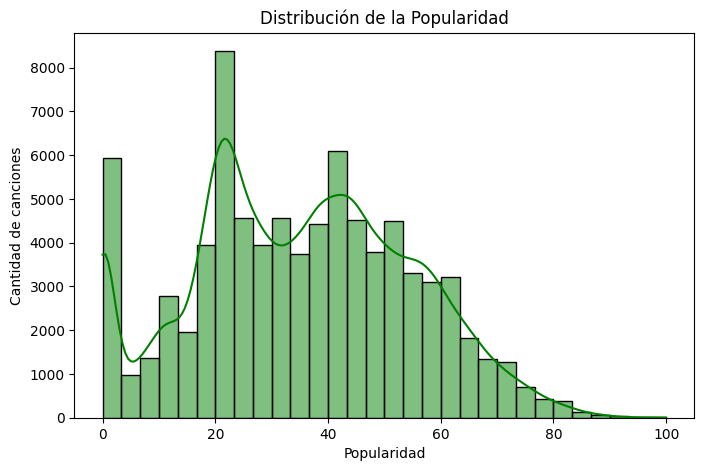

In [112]:
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=30, kde=True, color='green')
plt.title('Distribución de la Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de canciones')
plt.show()

### 🔹 Visualización de datos usando gráficos.

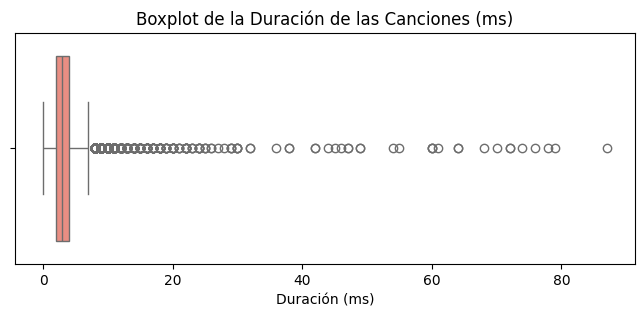

In [114]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['duration_min'], color='salmon')
plt.title('Boxplot de la Duración de las Canciones (ms)')
plt.xlabel('Duración (ms)')
plt.show()


### 🔹 Visualización de datos usando gráficos.

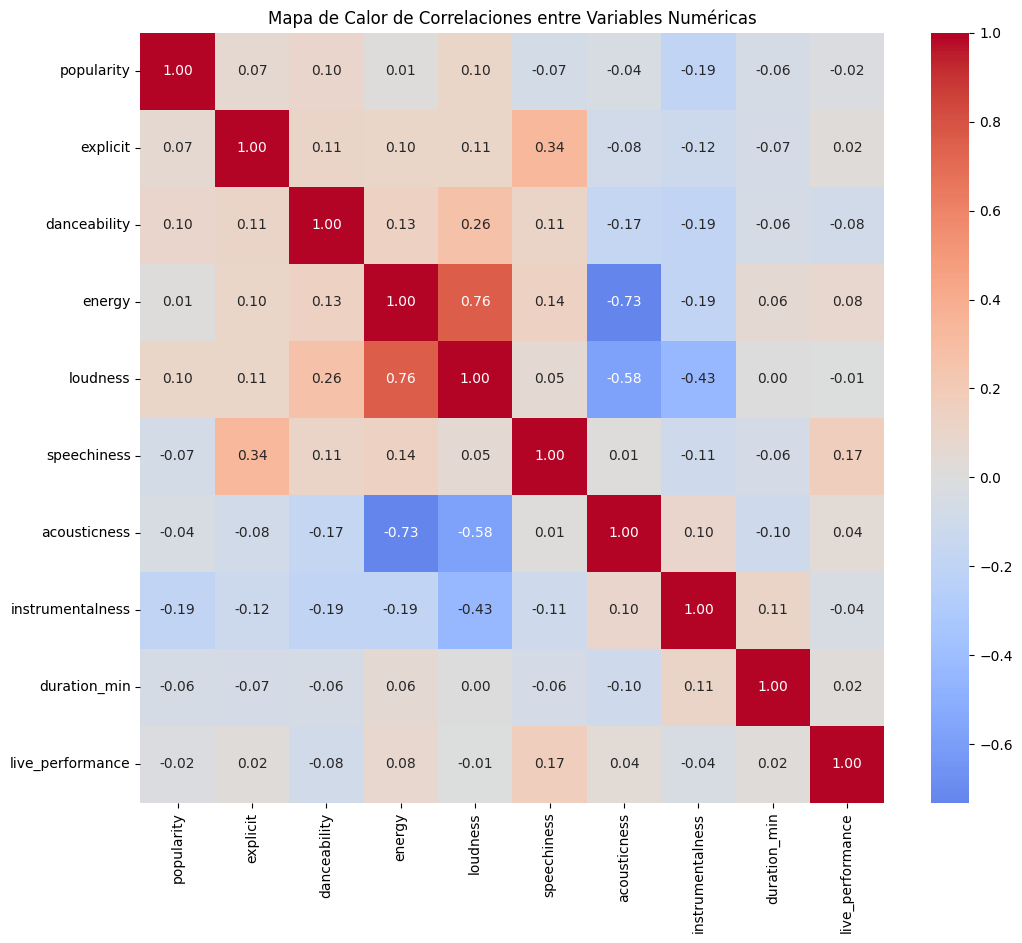

In [115]:
plt.figure(figsize=(12, 10))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()


### 🔹 Visualización de datos usando gráficos.

C:\Users\Acer\AppData\Local\Temp\ipykernel_33180\3353033183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='explicit', y='popularity', data=df, palette='Set2')


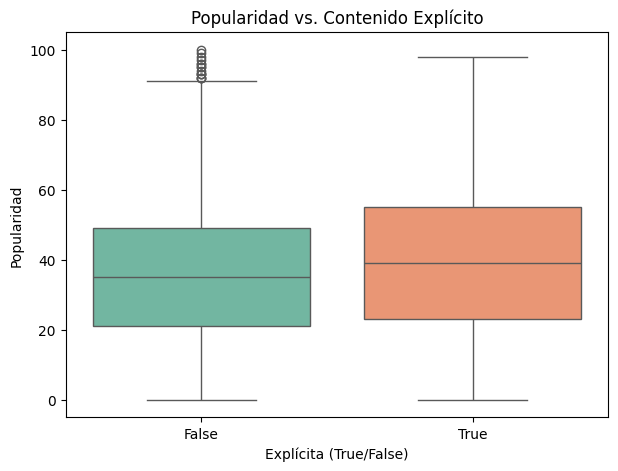

In [116]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='explicit', y='popularity', data=df, palette='Set2')
plt.title('Popularidad vs. Contenido Explícito')
plt.xlabel('Explícita (True/False)')
plt.ylabel('Popularidad')
plt.show()


### 🔹 Visualización de datos usando gráficos.

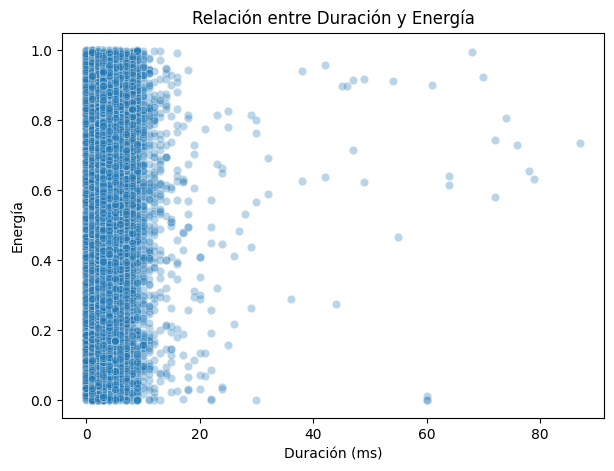

In [118]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='duration_min', y='energy', data=df, alpha=0.3)
plt.title('Relación entre Duración y Energía')
plt.xlabel('Duración (ms)')
plt.ylabel('Energía')
plt.show()


### 🔹 Visualización preliminar de las primeras filas del dataset.

C:\Users\Acer\AppData\Local\Temp\ipykernel_33180\16428290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


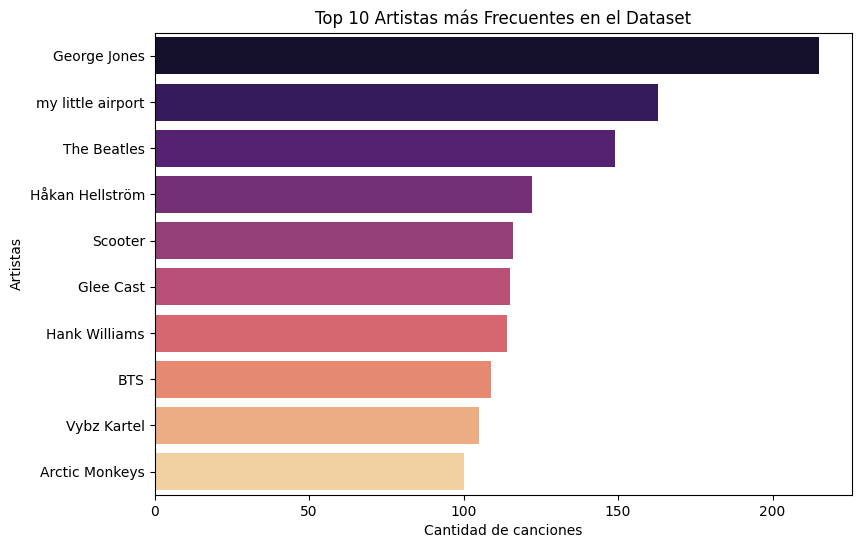

In [119]:
plt.figure(figsize=(9, 6))
top_artists = df['artists'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 10 Artistas más Frecuentes en el Dataset')
plt.xlabel('Cantidad de canciones')
plt.ylabel('Artistas')
plt.show()
